<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/08_nlp_native_bayes%26text_vectorization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Jul 21 22:53:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    29W /  70W |    453MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-21 22:53:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-21 22:53:11 (65.7 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir


#Load data

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-07-21 22:53:12--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 64.233.170.128, 142.251.175.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K   731KB/s    in 0.8s    

2023-07-21 22:53:13 (731 KB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [ ]:
train_df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df.keyword.value_counts(dropna=False)


NaN                      61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.location.value_counts(dropna=False)

NaN                             2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: location, Length: 3342, dtype: int64

In [ ]:
train_df.target.value_counts(dropna=False)


0    4342
1    3271
Name: target, dtype: int64

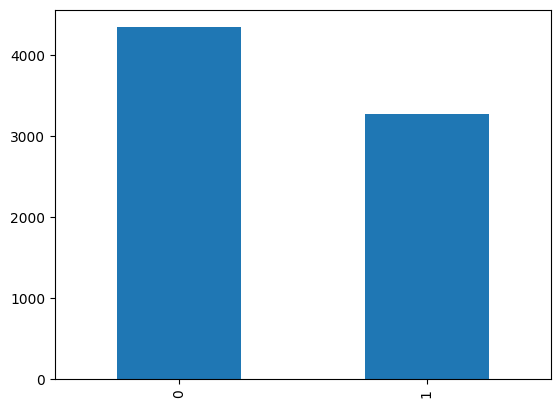

In [ ]:
train_df.target.value_counts(dropna=False).plot(kind="bar");


In [ ]:
print(len(train_df), len(test_df))



7613 3263


#Split data to train and validaion sets

In [ ]:
from sklearn.model_selection import train_test_split

train_ds, val_ds = train_test_split(train_df, test_size=0.1, random_state=42)

In [ ]:
print(train_ds.shape)
print(val_ds.shape)

(6851, 5)
(762, 5)


In [ ]:
train_ds.head()

,id,keyword,location,text,target
4620,6568,injury,"Plano, Texas",'McFadden Reportedly to Test Hamstring Thursda...,0
2858,4107,drought,Nigeria,w--=-=-=-[ NEMA warns Nigerians to prepare for...,1
3098,4448,electrocuted,NaN,When I was cooking earlier I got electrocuted ...,0
3751,5330,fire,Canada,I'm On Fire. http://t.co/WATsmxYTVa,0
5285,7552,outbreak,Indonesia,More than 40 families affected by the fatal ou...,1


In [ ]:
val_ds.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


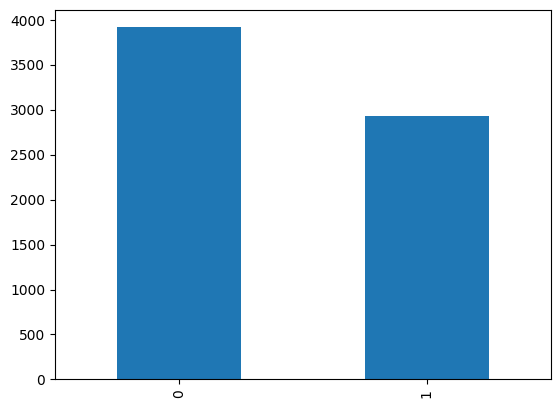

In [ ]:
train_ds.target.value_counts(dropna=False).plot(kind="bar");



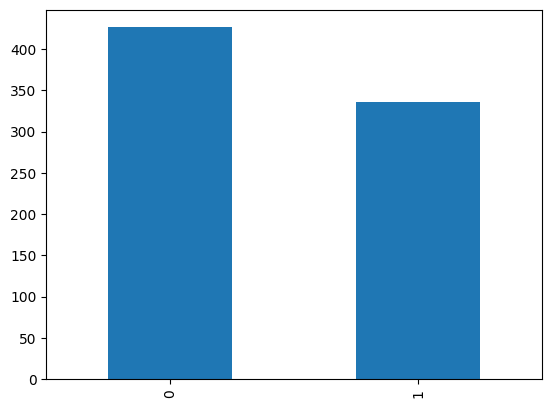

In [ ]:
val_ds.target.value_counts(dropna=False).plot(kind="bar");

## TextVectorization

In [ ]:
from  tensorflow.keras.layers import TextVectorization

In [ ]:
vectorizater = TextVectorization()

In [ ]:
text_vect = vectorizater.adapt(train_ds.text)


In [ ]:
len(vectorizater.get_vocabulary())


21089

In [ ]:
text_vect

In [ ]:
vectorizater.get_vocabulary()[-5:]

['010217', '010156', '0025', '001116', '0011']

In [ ]:
vectorizater(["this is a test"])


<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[  19,    9,    3, 1238]])>

In [ ]:
vectorizater.get_vocabulary()[1238]

'test'

## Embedding

In [ ]:
from tensorflow.keras.layers import Embedding


In [ ]:
emb = Embedding(input_dim=21089, output_dim=128)

In [ ]:
test = emb(vectorizater(["this is a test"]))

test.shape


TensorShape([1, 4, 128])

In [ ]:
test2 = emb(vectorizater(["this is a test test test"]))

test2.shape

TensorShape([1, 6, 128])

## Create a baseline using Native Baise model from sklearn

### Clean text

In [ ]:
train_ds.head().text


4620    'McFadden Reportedly to Test Hamstring Thursda...
2858    w--=-=-=-[ NEMA warns Nigerians to prepare for...
3098    When I was cooking earlier I got electrocuted ...
3751                 I'm On Fire.  http://t.co/WATsmxYTVa
5285    More than 40 families affected by the fatal ou...
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(stopwords.words('english'))

179

In [ ]:
import re
import string
# clean text
def clean_text(text):
  text = text.lower()
  # remove urls
  text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
  text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
  # remove punctuation
  operator = str.maketrans('','',string.punctuation)
  text = text.translate(operator)
  #remove digitals
  text = re.sub('\w*\d\w*', '', text)
  text = ' '.join([w for w in text.split() if w not in stopwords.words('english')])
  text = text.encode('ascii', 'ignore').decode('utf8').strip()
  return text

In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [ ]:
train_ds['clean_text'] = train_ds.text.progress_apply(clean_text)

  0%|          | 0/6851 [00:00<?, ?it/s]

In [ ]:
train_ds.head()

,id,keyword,location,text,target,clean_text
4620,6568,injury,"Plano, Texas",'McFadden Reportedly to Test Hamstring Thursda...,0,mcfadden reportedly test hamstring thursday via
2858,4107,drought,Nigeria,w--=-=-=-[ NEMA warns Nigerians to prepare for...,1,w nema warns nigerians prepare drought
3098,4448,electrocuted,NaN,When I was cooking earlier I got electrocuted ...,0,cooking earlier got electrocuted crucial im ps...
3751,5330,fire,Canada,I'm On Fire. http://t.co/WATsmxYTVa,0,im fire
5285,7552,outbreak,Indonesia,More than 40 families affected by the fatal ou...,1,families affected fatal outbreak legionnaires ...


In [ ]:
train_ds.shape, val_ds.shape, train_df.shape, test_df.shape


((6851, 6), (762, 5), (7613, 5), (3263, 4))

### Lemmatisation

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp("This is a sentence.")
print([(w.text, w.pos_) for w in doc])

[('This', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ('sentence', 'NOUN'), ('.', 'PUNCT')]


In [ ]:
def get_lemmas(text):
  # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas
            if lemma.isalpha()]
    return ' '.join(a_lemmas)

In [ ]:
train_df['lemmas'] = train_df.text.progress_apply(clean_text).progress_apply(get_lemmas)


  0%|          | 0/7613 [00:00<?, ?it/s]

  0%|          | 0/7613 [00:00<?, ?it/s]

In [ ]:
train_df.head()

,id,keyword,location,text,target,lemmas
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive we
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfire pour...


In [ ]:
# split again to train, val dataset

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_df.lemmas, train_df.target, test_size=0.2, random_state=142)


In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape


((6090,), (1523,), (6090,), (1523,))

## Apply Native Bayes

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score


In [ ]:
vectorizer = TfidfVectorizer()

x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)

In [ ]:
x_train_tfidf.shape

(6090, 11020)

In [ ]:
len(vectorizer.get_feature_names_out())

11020

In [ ]:
vectorizer.vocabulary_


{'railway': 7775,
 'catch': 1528,
 'unawares': 10154,
 'mp': 6337,
 'tragedy': 9922,
 'accident': 42,
 'spot': 9100,
 'never': 6524,
 'mark': 5877,
 'vulnerable': 10481,
 'fifth': 3461,
 'predynastic': 7505,
 'king': 5273,
 'legendary': 5469,
 'period': 7213,
 'deluge': 2442,
 'dumuzid': 2861,
 'shepherd': 8678,
 'want': 10512,
 'burst': 1322,
 'flame': 3533,
 'anna': 360,
 'hug': 4545,
 'tightly': 9774,
 'meatlove': 5981,
 'feminist': 3434,
 'world': 10799,
 'riot': 8150,
 'grill': 4069,
 'arrive': 498,
 'wild': 10700,
 'fire': 3496,
 'west': 10630,
 'crazy': 2153,
 'stick': 9210,
 'sleeper': 8864,
 'train': 9926,
 'hour': 4522,
 'derail': 2492,
 'due': 2852,
 'landslide': 5388,
 'definitely': 2424,
 'pit': 7319,
 'trip': 9995,
 'even': 3196,
 'though': 9722,
 'bsg': 1263,
 'sufficiently': 9340,
 'hype': 4594,
 'year': 10918,
 'somehow': 8975,
 'delay': 2431,
 'watch': 10551,
 'utterly': 10308,
 'blow': 1047,
 'away': 658,
 'gunsense': 4131,
 'answer': 374,
 'gfzs': 3888,
 'break': 11

In [ ]:
#x_train_tfidf.toarray()

In [ ]:
model = MultinomialNB()
model.fit(x_train_tfidf.toarray(), y_train)

predict = model.predict(x_val_tfidf.toarray())
print(f"base accuracy = {accuracy_score(y_val, predict):.2f}")


base accuracy = 0.81


In [ ]:
predict[-1], x_val.to_list()[-1]

(0,
 'recommend anyone job rn emergency service full time rise de lima campus hiring')

In [ ]:
predict

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_most_frequency_words(vect, data):
  # zipping actual words and sum of their Tfidf for corpus
  features_rank = list(zip(vect.get_feature_names_out(), [x[0] for x in data.sum(axis=0).T.tolist()]))

  # sorting
  features_rank = np.array(sorted(features_rank, key=lambda x:x[1], reverse=True))

  n = 10
  plt.figure(figsize=(5, 10))
  plt.barh(-np.arange(n), features_rank[:n, 1].astype(float), height=.8)
  plt.yticks(ticks=-np.arange(n), labels=features_rank[:n, 0])
  plt.title('Most frequent words')
  plt.show()

In [ ]:
def get_most_frequent_words(vect, tfidf_data, n = 10):
    scores = zip(vect.get_feature_names_out(),
                 np.asarray(tfidf_data.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return sorted_scores[:n]


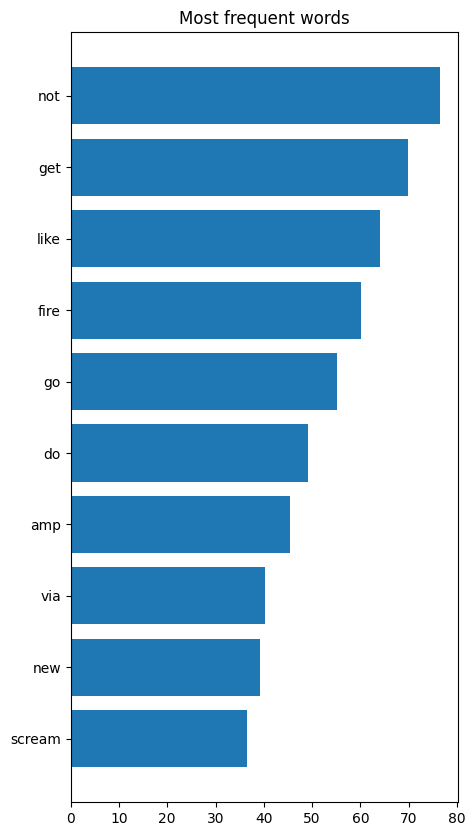

In [ ]:
plot_most_frequency_words(vectorizer, x_train_tfidf)


In [ ]:
most_fr_words = get_most_frequent_words(vectorizer, x_train_tfidf)
print(pd.DataFrame (most_fr_words, columns=['word', 'score']))


     word      score
0     not  76.386092
1     get  69.805766
2    like  63.978570
3    fire  60.109514
4      go  55.082286
5      do  49.093983
6     amp  45.447592
7     via  40.245476
8     new  39.189953
9  scream  36.568257


<Axes: ylabel='word'>

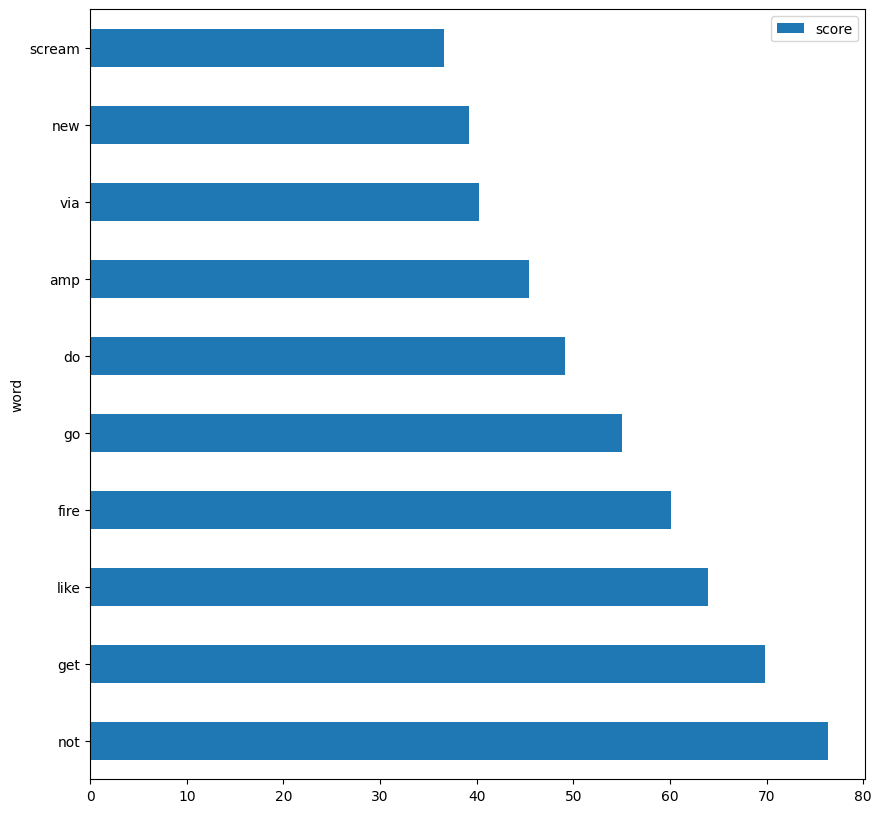

In [ ]:
pd.DataFrame (most_fr_words, columns=['word', 'score']).plot(x='word', y='score', kind='barh', figsize=(10, 10))



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


def get_scale_metrics(y_true, y_predict):
    accuracy = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)

    return {"accuracy": accuracy, "precision":precision, "recall":recall, "f1":f1}

In [ ]:
print(get_scale_metrics(y_val, predict))

{'accuracy': 0.8128693368351937, 'precision': 0.8683127572016461, 'recall': 0.656298600311042, 'f1': 0.7475642161204606}


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predict))


              precision    recall  f1-score   support

           0       0.79      0.93      0.85       880
           1       0.87      0.66      0.75       643

    accuracy                           0.81      1523
   macro avg       0.83      0.79      0.80      1523
weighted avg       0.82      0.81      0.81      1523



In [ ]:
(880/1523.0)**2 + (643/1523.0)**2


0.512107846032535

## Create RNN model
1. clean text
2. split to train/val dataset
3. apply TextVectorization
4. build model using Embedding and LSTM layers

In [ ]:
train_df.head()


,id,keyword,location,text,target,lemmas
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive we
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfire pour...


In [ ]:
# clean text
train_df['clean_text'] = train_df['text'].apply(lambda x: clean_text(x))

print(f'max lenght of text = {max(train_df.text.apply(len))}')
print(f'max lenght of clean text = {max(train_df.clean_text.apply(len))}')
train_df.head()

max lenght of text = 138


,id,keyword,location,text,target,lemmas,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive we,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfires pou...


In [ ]:
print(f'max lenght of text = {max(train_df.text.apply(len))}')
print(f'max lenght of clean text = {max(train_df.clean_text.apply(len))}')

max lenght of text = 157
max lenght of clean text = 138


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_df.clean_text, train_df.target, test_size=0.2, random_state=142)
print(x_train.shape, x_val.shape)

(6090,) (1523,)


In [ ]:
from tensorflow.keras.layers import TextVectorization

max_length = 128
max_vocab_length = 10000

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)
text_vectorizer.adapt(x_train)

In [ ]:
len(text_vectorizer.get_vocabulary())


10000

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import LSTM, Embedding, Dense, Input
from tensorflow.keras.models import Model

inputs = Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = Embedding(max_vocab_length, 128, input_length=max_length)(x)
x = LSTM(128)(x)
x = Dense(1, activation='sigmoid')(x)

model_rnn = Model(inputs = inputs, outputs = x)

model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_13 (Text  (None, 128)              0         
 Vectorization)                                                  
                                                                 
 embedding_13 (Embedding)    (None, 128, 128)          1280000   
                                                                 
 lstm_18 (LSTM)              (None, 128)               131584    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________

In [ ]:
history_rnn  = model_rnn.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


Epoch 1/5
191/191 [==============================] - 27s 103ms/step - loss: 0.6852 - accuracy: 0.5652 - val_loss: 0.6819 - val_accuracy: 0.5778
Epoch 2/5
191/191 [==============================] - 6s 32ms/step - loss: 0.6843 - accuracy: 0.5685 - val_loss: 0.6832 - val_accuracy: 0.5778
Epoch 3/5
191/191 [==============================] - 4s 22ms/step - loss: 0.6841 - accuracy: 0.5685 - val_loss: 0.6817 - val_accuracy: 0.5778
Epoch 4/5
191/191 [==============================] - 4s 19ms/step - loss: 0.6850 - accuracy: 0.5685 - val_loss: 0.6810 - val_accuracy: 0.5778
Epoch 5/5
191/191 [==============================] - 3s 18ms/step - loss: 0.6843 - accuracy: 0.5685 - val_loss: 0.6817 - val_accuracy: 0.5778


In [ ]:
model_rnn.evaluate(x_val, y_val)


48/48 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.5778


[0.6817449927330017, 0.5778069496154785]

In [ ]:
model_rnn.save('model_rnn.h5')

NotImplementedError: ignored